<a href="https://colab.research.google.com/github/bulda/TensofFlow/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 epoch = 0 cost = 8.619464874267578
 epoch = 100 cost = 2.7974672317504883
 epoch = 200 cost = 1.5853883028030396
 epoch = 300 cost = 1.3259456157684326
 epoch = 400 cost = 1.2704124450683594
 epoch = 500 cost = 1.2585258483886719
 epoch = 600 cost = 1.2559814453125
 epoch = 700 cost = 1.255436897277832
 epoch = 800 cost = 1.2553203105926514
 epoch = 900 cost = 1.2552953958511353
 epoch = 1000 cost = 1.2552900314331055
accuracy = 0.949999988079071. correct = Tensor("Equal_14:0", dtype=bool)
[ 1.360122   -0.24191399]


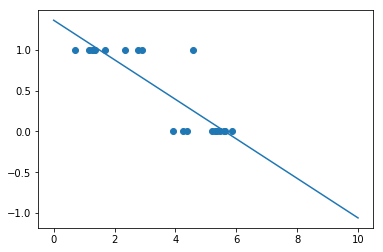

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5,1,10)
x_label1 = np.random.normal(2,1,10)
xs = np.append(x_label0,x_label1)
labels = [0.]*len(x_label0) +[1.]*len(x_label1)

plt.scatter(xs, labels)

learning_rate = 0.001
traiming_epochs = 1001

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
  return tf.add(tf.multiply(w[1], tf.pow(X,1)), tf.multiply(w[0], tf.pow(X,0)))

w = tf.Variable([0., 0.], name = "param")
y_ = model(X,w)

cost = tf.reduce_sum(tf.square(Y - y_))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)

  for epoch in range(traiming_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    cost_ = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 100 == 0:
      print(f' epoch = {epoch} cost = {cost_}')
  
  tmp = tf.cast(tf.greater(y_, 0.5), tf.float32)
  correct = tf.equal(Y, tmp)
  #print(f'{correct}')
  accuracy_tmp = tf.reduce_mean(tf.cast(correct, tf.float32))
  accuracy = sess.run(accuracy_tmp, feed_dict={X: xs, Y: labels})
  print(f'accuracy = {accuracy}. correct = {correct}')
  
  w_val = sess.run(w)
  print(f'{w.eval()}')

all_xs = np.linspace(0,10,100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()



0 0.6931461
1 0.6892262
2 0.68534386
3 0.68149966
4 0.67769337
5 0.67392445
6 0.6701929
7 0.6664978
8 0.6628389
9 0.6592161
10 0.6556291
11 0.6520771
12 0.64855987
13 0.64507717
14 0.6416288
15 0.638214
16 0.6348327
17 0.6314843
18 0.62816876
19 0.6248855
20 0.62163407
21 0.61841434
22 0.61522603
23 0.6120685
24 0.6089418
25 0.60584503
26 0.60277855
27 0.5997415
28 0.59673387
29 0.59375507
30 0.59080493
31 0.58788306
32 0.58498925
33 0.58212316
34 0.5792843
35 0.57647264
36 0.5736876
37 0.57092917
38 0.56819695
39 0.5654904
40 0.56280947
41 0.56015384
42 0.55752325
43 0.55491734
44 0.5523359
45 0.5497785
46 0.54724514
47 0.54473513
48 0.54224867
49 0.5397851
50 0.53734446
51 0.5349263
52 0.53253037
53 0.5301565
54 0.5278044
55 0.5254739
56 0.5231646
57 0.52087635
58 0.51860887
59 0.51636195
60 0.51413536
61 0.51192886
62 0.50974214
63 0.5075751
64 0.5054274
65 0.50329894
66 0.5011895
67 0.49909866
68 0.4970264
69 0.4949726
70 0.4929367
71 0.49091873
72 0.4889185
73 0.48693585
74 0.4849

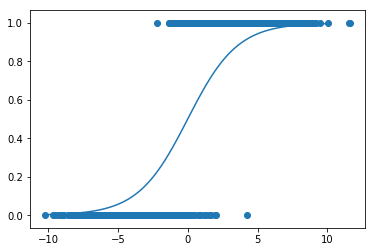

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs = 1000

def sigmoid(x):
  return 1./(1.+ np.exp(-x))

x1 = np.random.normal(-4,2,1000)
x2 = np.random.normal(4,2,1000)
xs = np.append(x1,x2)
ys = np.asarray([0.] * len(x1) + [1.]*len(x2))
plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="param", trainable=True)
y_model = tf.sigmoid(w[1]*X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  prev_err = 0
  for epoch in range(training_epochs):
    err,_ = sess.run([cost,train_op], {X: xs, Y: ys})
    #print(epoch, err)
    if abs(prev_err - err) < 0.0001:
      break
    prev_err = err
  w_val = sess.run(w, {X: xs, Y: ys})

all_xs = np.linspace(-10,10,100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show()


0 0.6931461
100 0.368898
200 0.2718484
300 0.21556312
400 0.17944051
500 0.1544885
600 0.13626747
700 0.122384615
[ 5.270938   -0.3883872  -0.93549514]
----- 0.0 ------
----- 0.5263157894736842 ------
----- 1.0526315789473684 ------
----- 1.5789473684210527 ------
----- 2.1052631578947367 ------
----- 2.631578947368421 ------
----- 3.1578947368421053 ------
----- 3.6842105263157894 ------
----- 4.2105263157894735 ------
----- 4.7368421052631575 ------
----- 5.263157894736842 ------
----- 5.789473684210526 ------
----- 6.315789473684211 ------
----- 6.842105263157895 ------
----- 7.368421052631579 ------
----- 7.894736842105263 ------
----- 8.421052631578947 ------
----- 8.947368421052632 ------
----- 9.473684210526315 ------
----- 10.0 ------


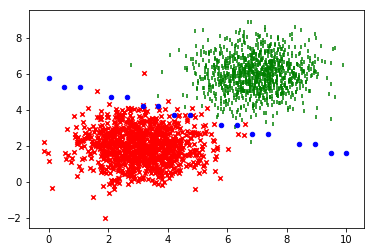

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate = 0.1
training_epochs = 2000

def sigmoid(x):
  return 1./(1 + np.exp(-x))

x1_label1 = np.random.normal(3,1,1000)
x2_label1 = np.random.normal(2,1,1000)
x1_label2 = np.random.normal(7,1,1000)
x2_label2 = np.random.normal(6,1,1000)


x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

plt.scatter(x1_label1,x2_label1,c='r', marker='x', s=20)
plt.scatter(x1_label2,x2_label2, c='g', marker='|', s=20)

X1 = tf.placeholder(tf.float32, shape=(None,), name = "x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name = "x2")
Y = tf.placeholder(tf.float32, shape=(None,), name='y')
w = tf.Variable([0., 0., 0.], name = "w", trainable=True) 

y_model = tf.sigmoid(-(w[2]*X2 + w[1]*X1 + w[0]))
cost = tf.reduce_mean(-tf.log(y_model * Y + (1-y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  prev_err = 0
  for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y:ys})
    if epoch % 100 == 0:
      print(epoch, err)
    if abs(prev_err - err) < 0.0001:
      break
    prev_err = err
  w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

print(w_val)
x1_boundary, x2_boundary = [], []
rangeX = np.linspace(0, 10, 20)

for x1_test in rangeX:
  print(f'----- {x1_test} ------')
  for x2_test in rangeX:
    z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
    if abs(z - 0.5) < 0.05:
      x1_boundary.append(x1_test)
      x2_boundary.append(x2_test)
      #print(f'== append ==')

plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
#plt.scatter(x1_bound,x2_bound,c='b', marker="o", s=20)
#plt.Line2D(x1_bound,x2_bound,color='b')
#plt.plot(all_xs, sigmoid(x2_bound*w_val[2]+x1_bound*w_val[1]+w_val[0]), c="b", marker="o")
#plt.plot(all_xs, z_bound, c="b", marker="o")

plt.show()